# Capitulo 2 : Distribuciones de Datos y Muestras

## Carga de los datos

In [45]:
# importamos librerias
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [33]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Definimos rutas a los conjuntos de datos. Si no mantienes los datos en el mismo directorio que el codigo, adapte los nombres de las rutas

In [34]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

## Distribucion Muestral del Estadistico

In [35]:
# cargar datos
loans_income = pd.read_csv(LOANS_INCOME_CSV)
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [36]:
# convertir en una serie el dataframe. Debe poseer una columna
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [37]:
# Creamos la muestra de los 1000 valores
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
14572,35000,Data
7042,130000,Data
37506,32000,Data
36554,97000,Data
25443,85000,Data


In [38]:
# creamos la muestra de 1000 media para 5 valores
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Media de 5'
})
sample_mean_05.head()

,income,type
0,73800.0,Media de 5
1,89200.0,Media de 5
2,55200.0,Media de 5
3,63536.0,Media de 5
4,85068.8,Media de 5


In [39]:
# creamos la muestra de 1000 media para 20 valores
sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'Media de 20'
})
sample_mean_20.head()

,income,type
0,66094.70,Media de 20
1,67773.00,Media de 20
2,81015.00,Media de 20
3,67794.15,Media de 20
4,74525.00,Media de 20


In [40]:
# Agrupamos los resultados
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
14572   35000.0  Data
7042   130000.0  Data
37506   32000.0  Data
36554   97000.0  Data
25443   85000.0  Data


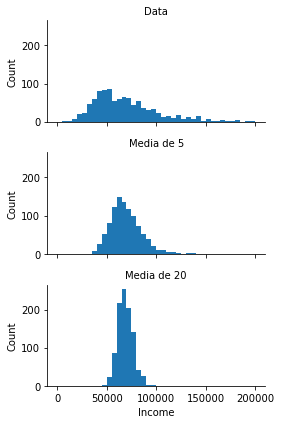

In [48]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();
